In [2]:
import os, sys
import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(16,4))
plt.rc("font", size=14)
ccrs.PlateCarree()

from dask.distributed import Client, LocalCluster
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4)
client = Client(cluster)
client



/home/durandy/miniconda3/envs/towel/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43429 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:43429/status,
Dashboard: http://137.129.155.67:43429/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/52013/1,Workers: 1
Dashboard: http://137.129.155.67:43429/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/52013/4,Total threads: 4
Dashboard: http://137.129.155.67:45775/status,Memory: 78.61 GiB
Nanny: None,


In [3]:
indir_data_Quantile = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/ANALYSIS/QUANTILE/TCWV/'

#####################################
### Creation du masque de données ###
#####################################
indir_smot = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/SMOTHED_CLIM/'
ds_smot = xr.open_mfdataset(indir_smot+'clim_OLR_smooth_ERA5_2000_2020.nc', chunks = {'time' : 1}, parallel=True)
mask = ds_smot.mean('time').load()


In [4]:
map_proj = ccrs.Mercator(central_longitude=180.0, 
                         min_latitude=-30.1, 
                         max_latitude=30.1,
                         globe=None)

# plt.rc("figure", figsize=(20,14))
cmap ='BrBG'
vmin, vmax = -10, +10

colorbar = {'label': 'OLR $W^{2}.m^{-4}$',
            'orientation': 'vertical' ,
            'extend' : 'both'}


# Quantile pour l'OLR et l'onde de Kelvin

In [12]:
ds_quan

<xarray.Dataset>
Dimensions:      (quantile: 7, lat: 40, lon: 240)
Coordinates:
  * lat          (lat) float64 29.5 28.0 26.5 25.0 ... -24.5 -26.0 -27.5 -29.0
  * lon          (lon) float32 0.0 1.5 3.0 4.5 6.0 ... 354.0 355.5 357.0 358.5
  * quantile     (quantile) float64 0.01 0.1 0.25 0.5 0.75 0.9 0.99
Data variables:
    TCWV_EIG     (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_Kelvin  (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_MJO     (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_MRG     (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_Rossby  (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_TD      (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>
    TCWV_WIG     (quantile, lat, lon) float64 dask.array<chunksize=(1, 20, 240), meta=np.ndarray>

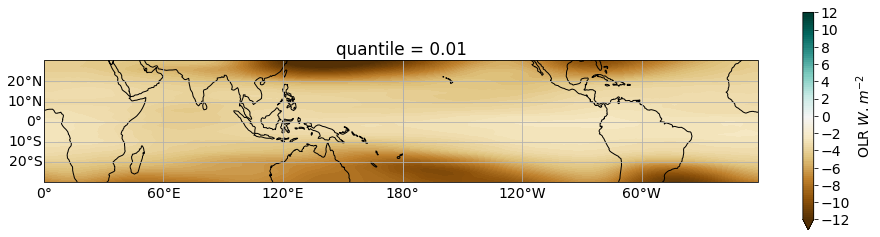

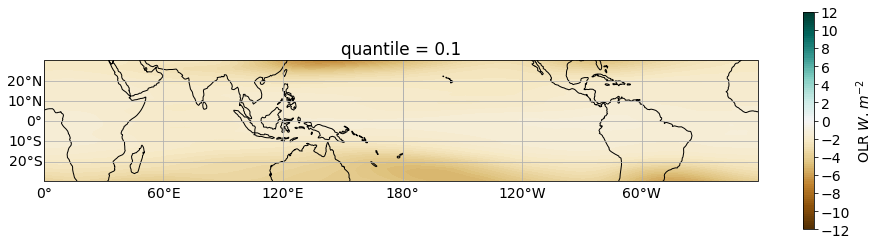

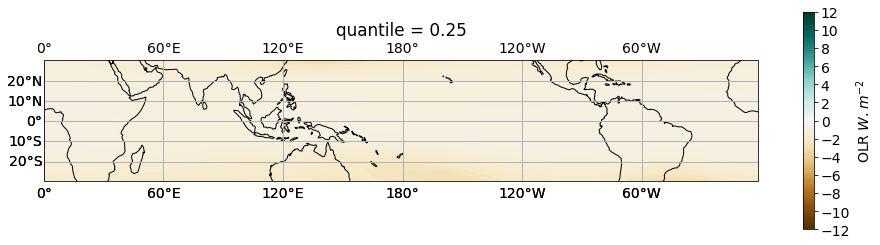

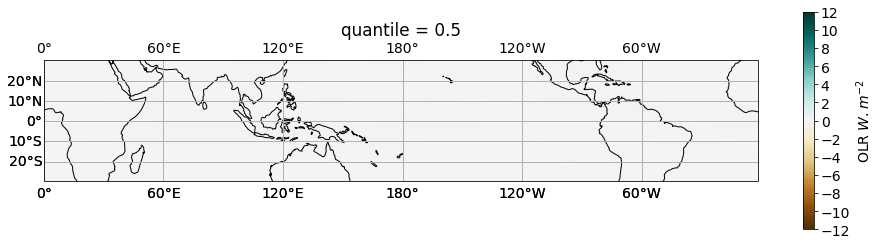

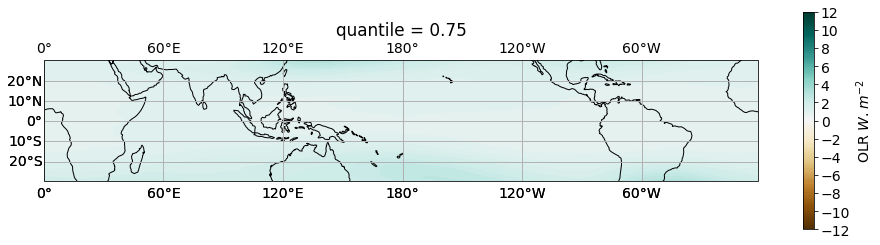

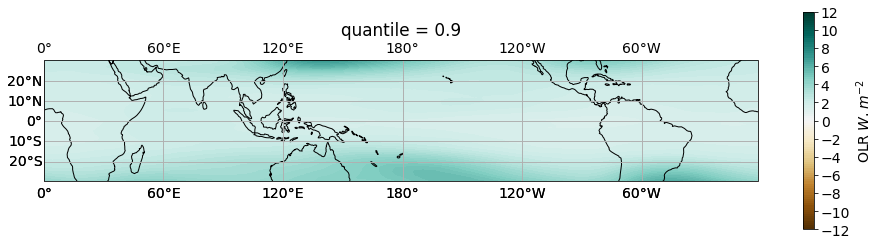

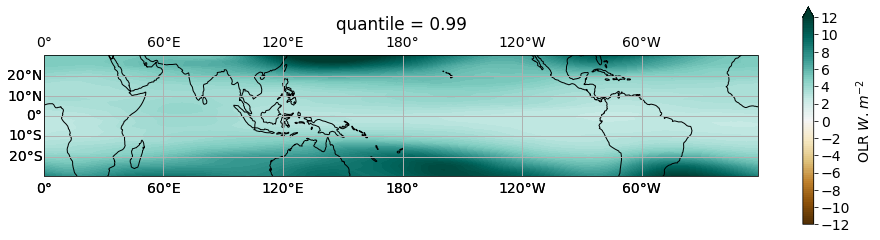

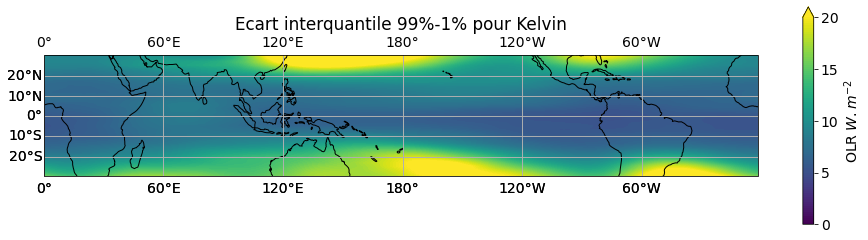

In [27]:
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
datasets = []
wave = 'Kelvin'
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds

plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -12, 12
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 20
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_DIFF.png')


# Quantile pour l'OLR et l'onde de Rossby

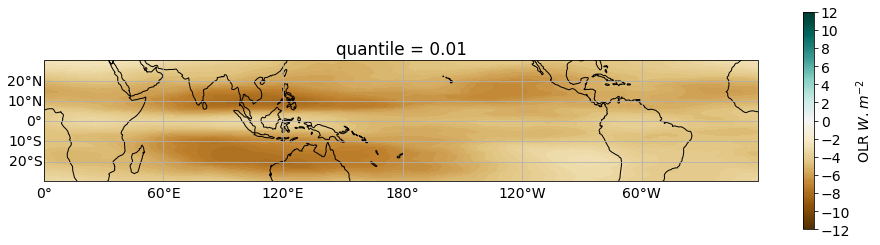

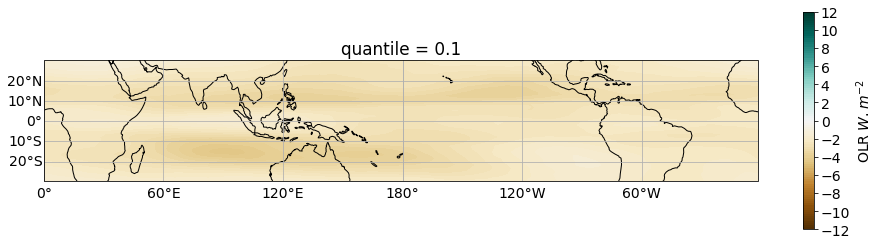

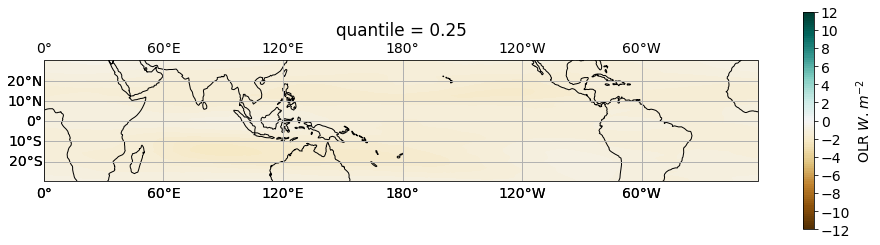

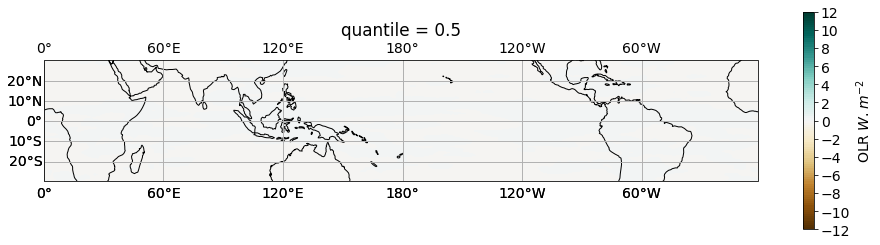

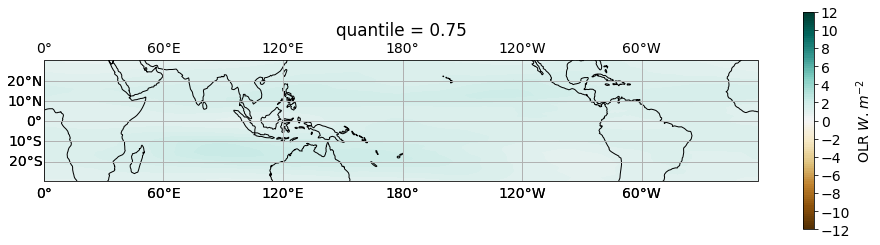

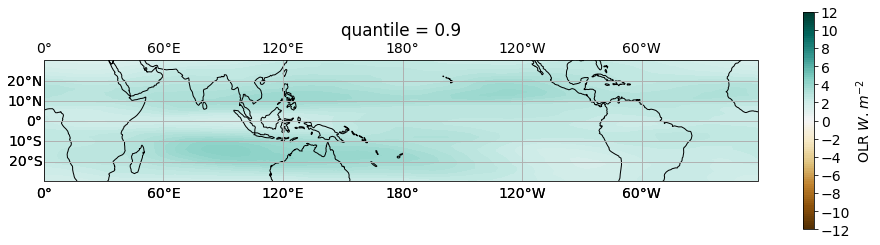

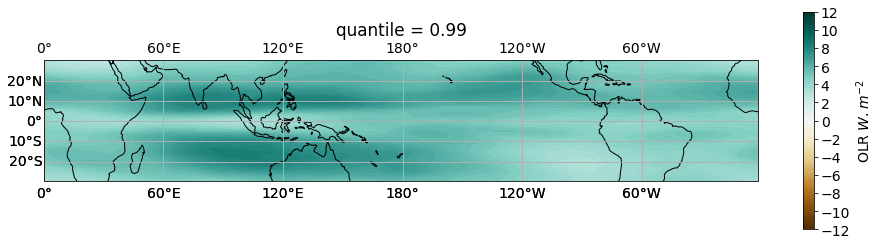

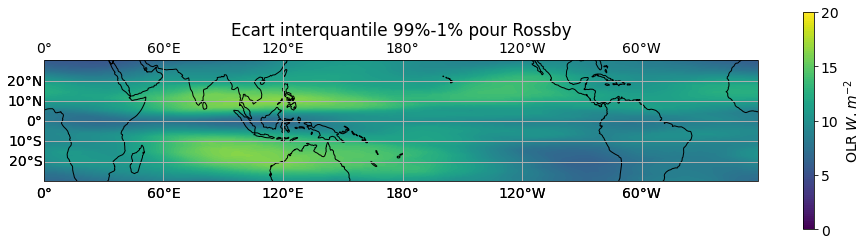

In [28]:
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
datasets = []
wave = 'Rossby'
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile  + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds

plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -12, 12
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 20
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_DIFF.png')


# Quantile pour l'OLR et la MJO

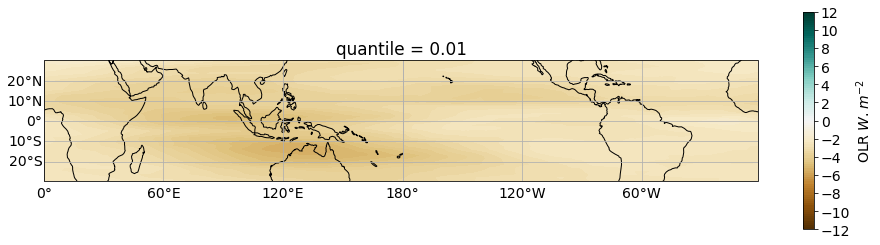

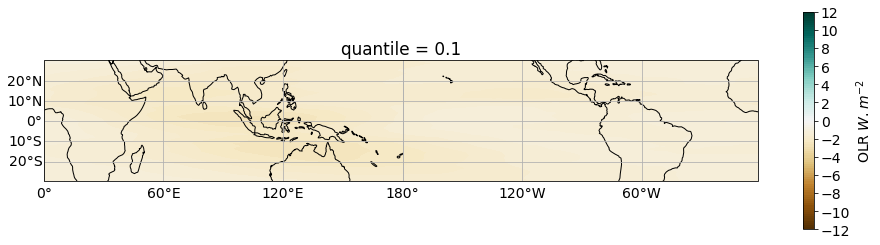

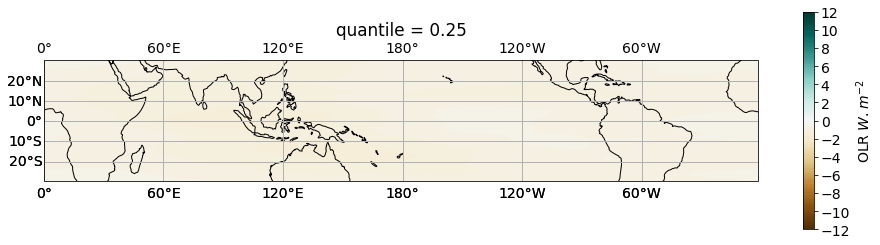

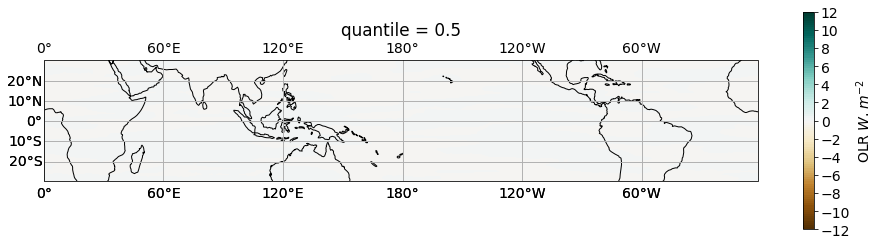

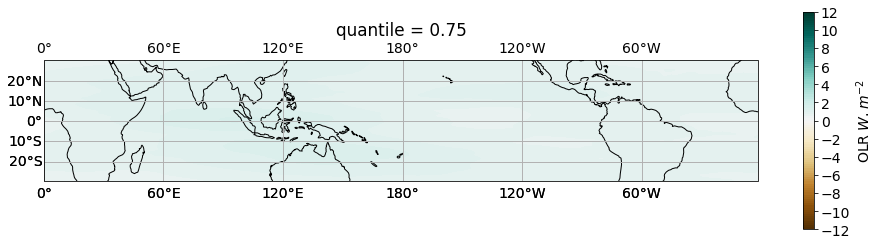

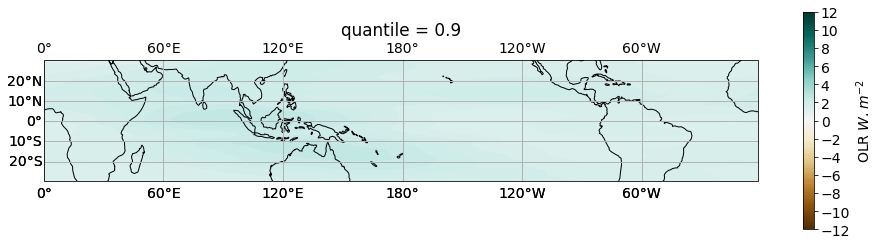

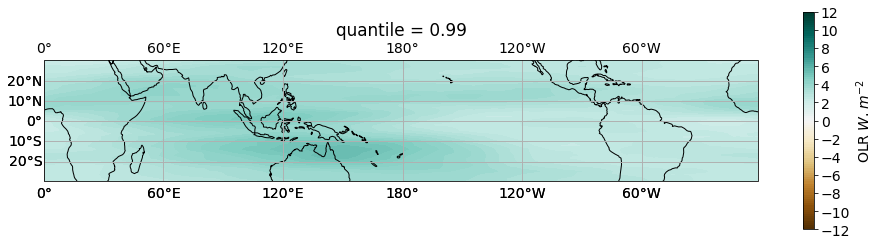

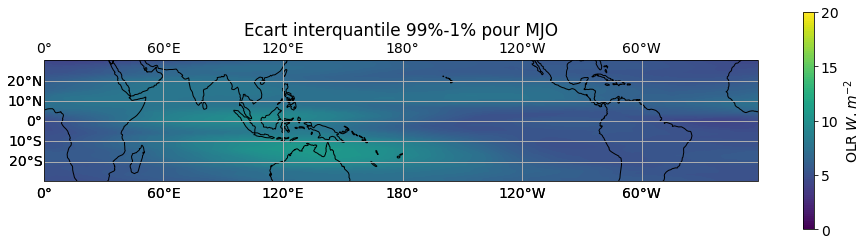

In [29]:
wave = 'MJO'
datasets = []
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds_quan



plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -12, 12
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 20
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/'
            + wave + '_DIFF.png')


# Quantile pour l'OLR et les TD

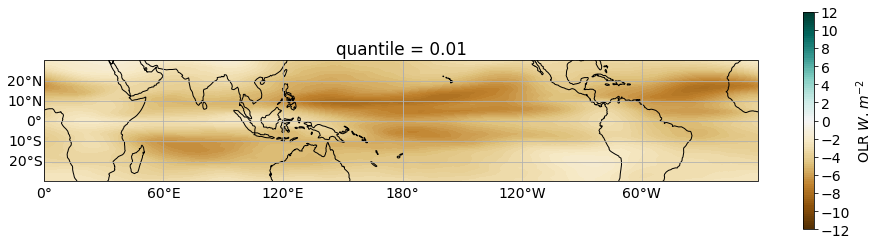

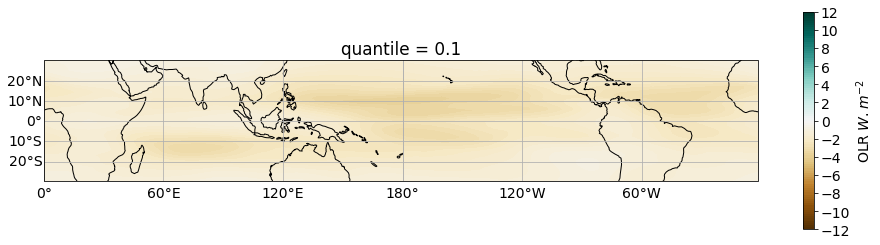

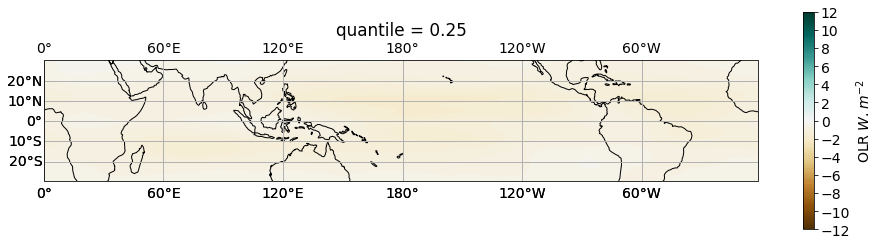

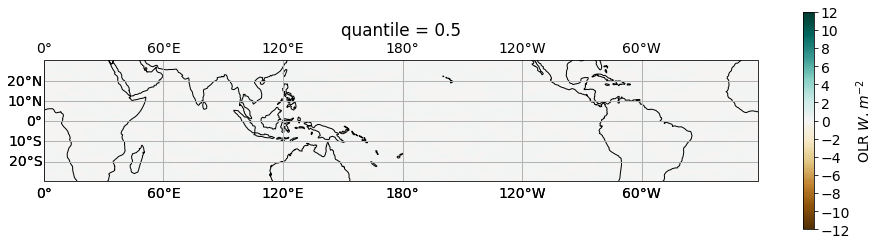

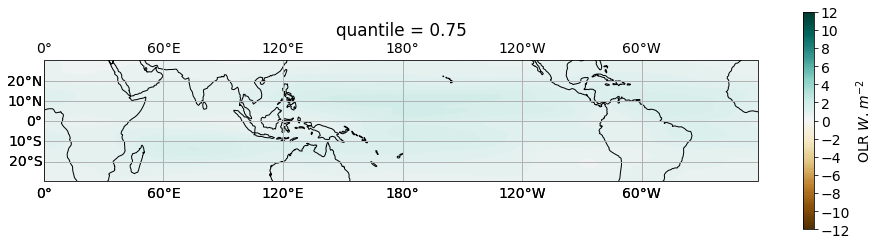

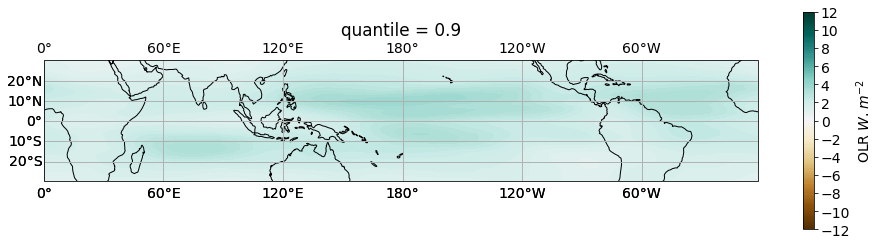

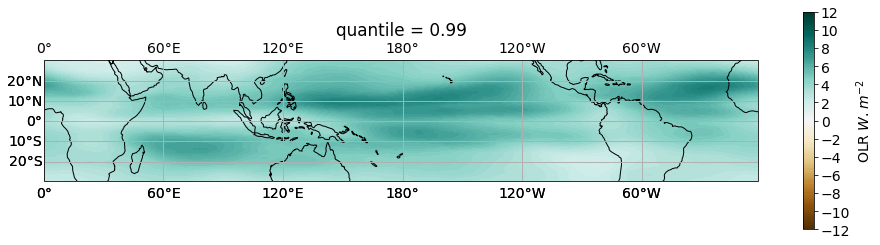

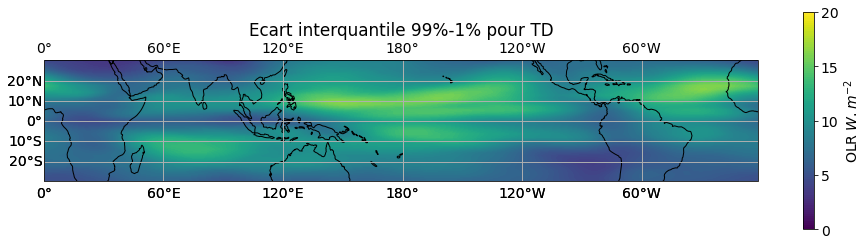

In [5]:
wave = 'TD'
datasets = []
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds_quan



plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -12, 12
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 20
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/'
            + wave + '_DIFF.png')


# Quantile pour l'OLR et l'onde MRG

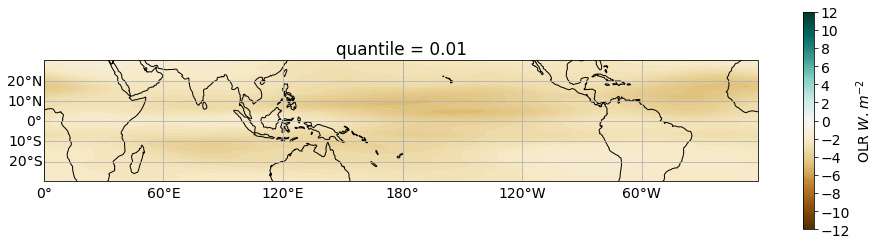

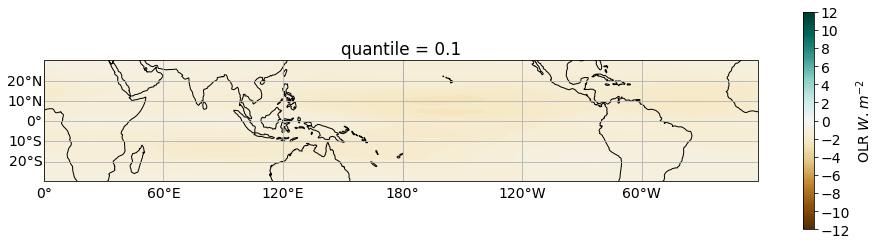

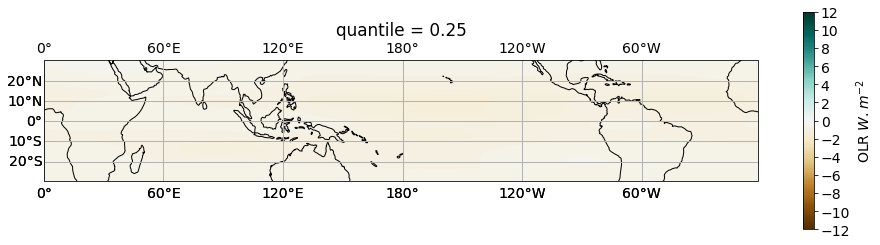

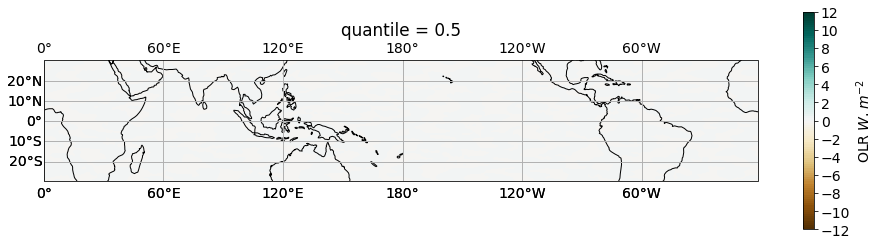

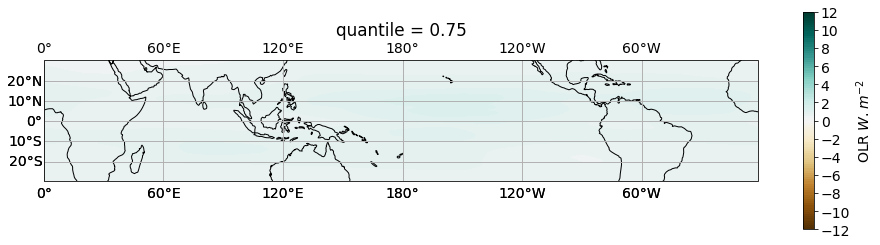

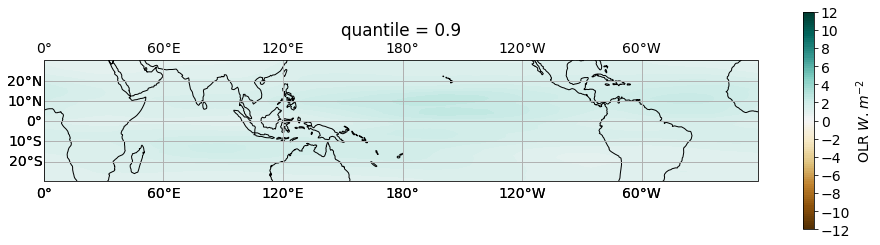

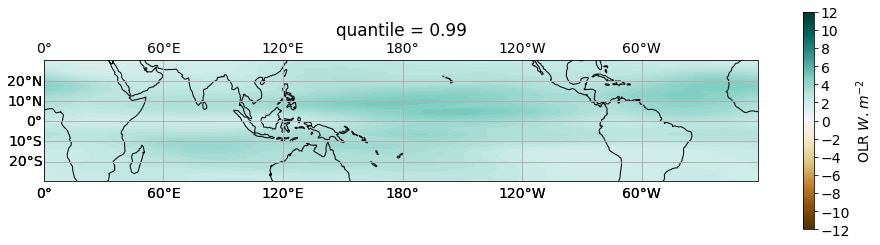

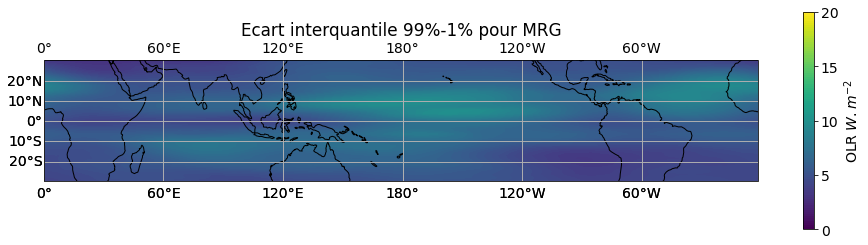

In [30]:
wave = 'MRG'
datasets = []
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds_quan



plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -12,12
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 20
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_DIFF.png')


# Quantile pour l'OLR et l'onde WIG

In [ ]:
wave = 'WIG'
datasets = []
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + wave + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds_quan



plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -10, 10
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 30
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_DIFF.png')


# Quantile pour l'OLR et l'onde EIG

In [ ]:
wave = 'EIG'
datasets = []
quantile = [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
for q in quantile :
    ds = xr.open_mfdataset(indir_data_Quantile + wave + '/*' + str(int(q*100)) + '.nc', parallel = True)
    datasets.append(ds)
ds_quan = xr.concat(datasets , dim ='quantile')
ds_quan



plt.rc("figure", figsize=(16,4))
cmap ='BrBG'
vmin , vmax = -20, 20
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,2),
            'extend' : 'max'}

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.01).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q01.png')
plt.show()

#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.1).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap , vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q10.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.25).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q25.png')
plt.show()
#####################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.5).plot.contourf(ax=axis, levels = 101,
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q50.png')
plt.show()
#######################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.75).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q75.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.9).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q90.png')
plt.show()
##########################################################################################
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

ds_quan['TCWV_' + wave].sel(quantile = 0.99).plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_Q99.png')
plt.show()
# plt.savefig(output_fig+'atlas_varYear_anomaly_TOUCAN.png')

#############################################################################################
#############################################################################################
#############################################################################################
vmin , vmax = 0, 30
cmap = 'viridis'
colorbar = {'label': 'OLR $W.m^{-2}$',
            'orientation': 'vertical' , 'ticks': np.arange(vmin,vmax+0.1,5),
            'extend' : 'max'}
diff_Q = ds_quan['TCWV_' + wave].sel(quantile = 0.99) - ds_quan['TCWV_' + wave].sel(quantile = 0.01)
fig, axis = plt.subplots(
    1, 1, subplot_kw={'projection': map_proj})

diff_Q.plot.contourf(ax=axis, levels = 101, 
                    transform=ccrs.PlateCarree(),
                    cmap=cmap, vmin = vmin, vmax = vmax,
                    cbar_kwargs=colorbar)
                    

axis.coastlines()
axis.gridlines(draw_labels=True)
gl = axis.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.title('Ecart interquantile 99%-1% pour '+ wave)
plt.savefig('/cnrm/tropics/commun/DATACOMMUN/WAVE/RAPPORT/FIGURES/Propre/Rapport/Chapter3/QUANTILE/TCWV/' 
            + wave + '_DIFF.png')


# Quantile pour l'OLR et l'onde